# Intro to Project
This is for a semester long project for an Introductory Machine Learning class CS07455.

The goal of the project is to get hands on experience with the entire practical machine learning process
from data exploration, cleaning, to modeling.

This is the Jupyter Notebook with all the code used for the project and some comments, but most of the details will be found in 
the final report 

# Background

### Dataset
- This Dataset was obtained from Kaggle: [Melbourne Housing Snapshot](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/)
#### Context
- Melbourne real estate is BOOMING. Can you find the insight or predict the next big trend to become a real estate mogul… or even harder, to snap up a reasonably priced 2-bedroom unit?

#### Notes on Specific Variables
- Rooms: Number of rooms

- Price: Price in dollars

- Method: 
<br>S - property sold; 
<br>SP - property sold prior; 
<br>PI - property passed in; 
<br>PN - sold prior not disclosed;
<br> SN - sold not disclosed; 
<br>NB - no bid;
<br> VB - vendor bid; 
<br>W - withdrawn prior to auction; 
<br>SA - sold after auction;
<br>SS - sold after auction price not disclosed. 
<br>N/A - price or highest bid not available.

- Type: 
<br>br - bedroom(s); 
<br>h - house,cottage,villa, semi,terrace; 
<br>u - unit, duplex; 
<br>t - townhouse; dev site - development site; 
<br>o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD (Central Business District)

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size

- BuildingArea: Building Size

- CouncilArea: Governing council for the area

#### Business Goals
- We will be using and training on this dataset to be able to predict the price of Melbourne houses. This is a great initiative as being able to accurately predict 
the price of houses can be useful to many different applications. For example it can be used by customers or investors to find houses for cheap. Or it can be used 
by sellers to see at what price points they should sell houses so they can maximize their profit and selling potential. Investors can use the model to quickly 
evaluate possible investments and what will yeild them the highest return on Investment.

# Data Exploration

Before we begin actually using Machine Learning on the dataset it is vital we explore it to fully understand what we are working with.

To make this process much easier we can simply use Pandas Profiling which is a very powerful module that will automate a lot of the Data Analysis for us.

To see a detailed discussion on the insights from the report and the data exploration phase in general please refer to the final project report.

In [44]:
# Import Libraries and Raw Dataset
import pandas as pd
df = pd.read_csv('raw_data.csv')


### Pandas Profiling

In [4]:
# Use Pandas Profiling to accelerate the Data Exploration process
# Profiling Report has already been created (see attached) but you can uncomment and re-run the code below to generate the report again

#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, tilte ='Melbourne Housing Raw Data Report')
#profile.to_file('RawDataReport.html')

### Explore Basic shape

In [2]:
df.shape # 21 features, 13580 rows

(13580, 21)

In [17]:
df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0


### Explore Features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [10]:
df.describe() # Describe all numerical columns

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [11]:
df.describe(include = ['O']) # Describe all non-numerical/categorical columns

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


### Duplication

In [24]:
df.duplicated(subset=['Address']).sum()

202

In [27]:
df.query('Address == "36 Aberfeldie St"')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4125,Moonee Ponds,36 Aberfeldie St,3,h,1725000.0,PI,Nelson,24/09/2016,6.9,3039.0,...,2.0,3.0,596.0,203.0,1950.0,Moonee Valley,-37.76090,144.90500,Western Metropolitan,6232.0
9240,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,3/06/2017,6.2,3039.0,...,2.0,2.0,596.0,203.0,1950.0,Moonee Valley,-37.76086,144.90497,Western Metropolitan,6232.0
9634,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,17/06/2017,6.2,3039.0,...,2.0,2.0,596.0,203.0,1950.0,Moonee Valley,-37.76086,144.90497,Western Metropolitan,6232.0


In [28]:
df.query('Address == "4 Bell St"')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1364,Brunswick,4 Bell St,4,h,1790000.0,S,Ray,27/06/2016,5.2,3056.0,...,1.0,1.0,416.0,129.0,1920.0,Moreland,-37.77370,144.96500,Northern Metropolitan,11918.0
9702,Richmond,4 Bell St,2,h,1172000.0,S,Collins,17/06/2017,2.4,3121.0,...,1.0,0.0,155.0,NaN,NaN,Yarra,-37.82418,145.00185,Northern Metropolitan,14949.0


In [3]:
# Function to find discrepancies in addresses that have duplicates
def find_discrepancies(df, Address, features):
    # Group by the address column
    grouped = df.groupby(Address)

    # Iterate over each group
    for address, group in grouped:
        # Proceed only if there is more than one entry for the address
        if len(group) > 1:
            # Check if all entries are the same for the feature columns
            if not group[features].eq(group[features].iloc[0]).all().all():
                # If not, print the group with discrepancies
                print(f"Discrepancies found for address: {address}")
                print(group.to_string(index=False))
                print("\n")

# List of feature columns to check
excluded_columns = ['Price', 'Method', 'SellerG']
features = [col for col in df.columns.tolist() if col not in excluded_columns]

# Find discrepancies
find_discrepancies(df, 'Address', features)


Discrepancies found for address: 1 Bellarine St
 Suburb        Address  Rooms Type     Price Method       SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude            Regionname  Propertycount
Preston 1 Bellarine St      4    h 1400000.0     VB        Jellis 18/03/2017       8.8    3072.0       4.0       2.0  2.0     559.0         217.0     1925.0     Darebin  -37.73470   144.99660 Northern Metropolitan        14577.0
Preston 1 Bellarine St      5    h 1400000.0     PI hockingstuart  3/06/2017       8.4    3072.0       5.0       2.0  2.0     558.0         217.0     1925.0     Darebin  -37.73472   144.99658 Northern Metropolitan        14577.0


Discrepancies found for address: 1 Daisy St
  Suburb    Address  Rooms Type     Price Method SellerG      Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt   CouncilArea  Lattitude  Longtitude           Regionname  Propertycount

### Correlations

No code here. See report.

### Categorical Variables relation to Price

In [37]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 350)

In [38]:
df[["CouncilArea", "Suburb"]].drop_duplicates().head(20)

,CouncilArea,Suburb
0,Yarra,Abbotsford
38,Moonee Valley,Airport West
78,Port Phillip,Albert Park
120,Darebin,Alphington
121,Yarra,Alphington
141,Hobsons Bay,Altona
186,Hobsons Bay,Altona North
221,Stonnington,Armadale
283,Moonee Valley,Ascot Vale
370,Boroondara,Ashburton


#### Descriptive Statistics of Price per categorical feature
"Type" of house especially shows a very strong indication. Other features also have some indication, whereas "Method" does not.

In [39]:
grouped_data = df.groupby('Regionname')['Price'].agg(['mean', 'median', 'std', 'count', 'var'])
print(grouped_data)

                                    mean     median            std  count           var
Regionname                                                                             
Eastern Metropolitan        1.104080e+06  1010000.0  467417.860272   1471  2.184795e+11
Eastern Victoria            6.999808e+05   670000.0  165498.190135     53  2.738965e+10
Northern Metropolitan       8.981711e+05   806250.0  443967.693818   3890  1.971073e+11
Northern Victoria           5.948293e+05   540000.0  217761.670461     41  4.742015e+10
South-Eastern Metropolitan  9.229438e+05   850000.0  506525.336100    450  2.565679e+11
Southern Metropolitan       1.372963e+06  1250000.0  822529.158614   4695  6.765542e+11
Western Metropolitan        8.664205e+05   793000.0  394144.700287   2948  1.553500e+11
Western Victoria            3.975234e+05   400000.0   86211.956532     32  7.432501e+09


In [43]:
grouped_data = df.groupby('CouncilArea')['Price'].agg(['mean', 'median', 'std', 'count', 'var'])
print(grouped_data.head(10))

                           mean     median            std  count           var
CouncilArea                                                                   
Banyule            9.444280e+05   802500.0  478687.885021    594  2.291421e+11
Bayside            1.652168e+06  1550000.0  792107.622046    489  6.274345e+11
Boroondara         1.647217e+06  1617500.0  923339.537548   1160  8.525559e+11
Brimbank           6.472007e+05   635400.0  154548.273134    424  2.388517e+10
Cardinia           5.731250e+05   601250.0  105863.372190      8  1.120705e+10
Casey              6.564079e+05   626250.0  165065.091799     38  2.724648e+10
Darebin            9.158000e+05   851000.0  452518.994126    934  2.047734e+11
Frankston          6.589849e+05   640000.0  188087.313044     53  3.537684e+10
Glen Eira          1.069279e+06  1040500.0  481916.074309    848  2.322431e+11
Greater Dandenong  6.970673e+05   683000.0  173325.971625     52  3.004189e+10


In [32]:
grouped_data = df.groupby('Type')['Price'].agg(['mean', 'median', 'std', 'count', 'var'])
print(grouped_data)

              mean     median            std  count           var
Type                                                             
h     1.242665e+06  1080000.0  668078.742092   9449  4.463292e+11
t     9.337351e+05   846750.0  395038.245773   1114  1.560552e+11
u     6.051275e+05   560000.0  260987.452871   3017  6.811445e+10


In [41]:
grouped_data = df.groupby('Method')['Price'].agg(['mean', 'median', 'std', 'count', 'var'])
print(grouped_data)

                mean    median            std  count           var
Method                                                            
PI      1.133242e+06  932500.0  730999.729516   1564  5.343606e+11
S       1.087327e+06  925000.0  613785.634739   9022  3.767328e+11
SA      1.025772e+06  872500.0  547952.730240     92  3.002522e+11
SP      8.998924e+05  770000.0  509987.899525   1703  2.600877e+11
VB      1.166510e+06  940000.0  805411.614931   1199  6.486879e+11


### Missing Values

In [42]:
missing_proportions = df.isnull().sum() / df.shape[0]
missing_proportions = missing_proportions * 100
print(missing_proportions[missing_proportions > 0])

Car              0.456554
BuildingArea    47.496318
YearBuilt       39.580265
CouncilArea     10.081001
dtype: float64


### Outliers

No code here. See report.

# Data Cleaning

### Remove unneeded features

In [45]:
# Removal of features that were decided to be removed in Data Exploration Phase
df = df.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Postcode'], axis=1)

In [46]:
# Propertycount was not fully evaluated in Exploration. Lets see if it holds anything significant
print(df['Price'].corr(df['Propertycount']))

-0.04215261472877342


In [47]:
# Remove Propertycount as well
df = df.drop(['Propertycount'], axis=1)

In [48]:
# In Exploration Phase it was seen that Rooms column is more accurate than Bedroom2
# There is no point in keeping two columns that will conflict with each other
df = df.drop(['Bedroom2'], axis=1)

In [49]:
# Created Duplicates. Drop those.
df = df.drop_duplicates()

In [50]:
# Lets see shape of data now
df.shape

(13579, 14)

### Dealing with Missing Values

In [51]:
# KNN Imputation is the most logical way of dealing with Missing Values and will give most accurate results
# CouncilArea is categorical so will be tricky. For that we can just set nulls to a "Missing String". Since only 10 percent not a huge deal
df['CouncilArea'] = df['CouncilArea'].fillna('MissingCouncil')

In [52]:
df.query("CouncilArea == 'MissingCouncil'").head(3)

,Rooms,Type,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
7584,3,h,1270000.0,20/05/2017,10.7,1.0,3.0,724.0,NaN,NaN,MissingCouncil,-37.92910,145.02970,Southern Metropolitan
10797,3,h,526250.0,8/07/2017,12.0,1.0,1.0,308.0,NaN,NaN,MissingCouncil,-37.72828,145.03033,Northern Metropolitan
12213,4,h,1436000.0,3/09/2017,7.5,3.0,3.0,511.0,187.0,1922.0,MissingCouncil,-37.75788,144.90487,Western Metropolitan


Impute BuildingArea

In [53]:
from sklearn.impute import KNNImputer

# Select only the columns that will be used for imputation
columns_for_imputation = ['Rooms', 'Bathroom', 'BuildingArea']
temp_df = df[columns_for_imputation]

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Perform imputation using only 'Rooms' and 'Bathroom' for 'BuildingArea'
temp_df_imputed = pd.DataFrame(imputer.fit_transform(temp_df), columns=temp_df.columns)

# Replace the 'BuildingArea' column in the original dataframe with the imputed values
df['BuildingArea'] = temp_df_imputed['BuildingArea']

In [54]:
missing_proportions = df.isnull().sum() / df.shape[0]
missing_proportions = missing_proportions * 100
print(missing_proportions[missing_proportions > 0])

Car              0.456587
BuildingArea     0.007364
YearBuilt       39.583180
dtype: float64


In [55]:
# Interestingly after filling missing BuildingArea, correlation between it and Price (and all other features) went down
# Still have 1 missing BuildingArea: just delete it
df = df.dropna(subset=['BuildingArea'])

missing_proportions = df.isnull().sum() / df.shape[0]
missing_proportions = missing_proportions * 100
print(missing_proportions[missing_proportions > 0])

Car           0.456621
YearBuilt    39.586095
dtype: float64


Impute 'Car'

In [56]:
# Car was most correlated with Rooms and Landsize
from sklearn.impute import KNNImputer

# Select only the columns that will be used for imputation
columns_for_imputation = ['Rooms', 'Landsize', 'Car']
temp_df = df[columns_for_imputation]

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Perform imputation using only 'Rooms' and 'Landsize' for 'Car'
temp_df_imputed = pd.DataFrame(imputer.fit_transform(temp_df), columns=temp_df.columns)

# Replace the 'Car' column in the original dataframe with the imputed values
df['Car'] = temp_df_imputed['Car']

In [57]:
# Again, it seems KNN Imputation leaves 1 row that still missing value
df = df.dropna(subset=['Car'])

missing_proportions = df.isnull().sum() / df.shape[0]
missing_proportions = missing_proportions * 100
print(missing_proportions[missing_proportions > 0])

YearBuilt    39.589011
dtype: float64


Impute 'YearBuilt'

In [58]:
print(df['YearBuilt'].median())

1970.0


In [59]:
# YearBuilt isn't correlated with anything
# Just replace it with the most common and median value
df['YearBuilt'] = df['YearBuilt'].fillna(1970)

In [60]:
# No More Missing Values!
missing_proportions = df.isnull().sum() / df.shape[0]
missing_proportions = missing_proportions * 100
print(missing_proportions[missing_proportions > 0])

Series([], dtype: float64)


### Dealing with Outliers

To see the reasoning behind the decisions below please refer to the final report

In [61]:
df.shape

(13577, 14)

In [62]:
# Remove the YearBuilt Extreme outlier
df = df[df['YearBuilt'] != 1196]
df.shape

(13576, 14)

In [63]:
# Move lower range of Bathrooms (0) to 5th percentile and move rare high cases to sensible maximum
df.loc[df['Bathroom'] == 0, 'Bathroom'] = 1
df.loc[df['Bathroom'].isin([5, 6, 7, 8]), 'Bathroom'] = 4

In [64]:
# Prices column has a lot of variation. Not always clear if there is a data entry error
# Since the Price column is important we should remove the abnormaly high and low prices rather than distort reality by changing them
df = df[(df['Price'] >= 235000) & (df['Price'] <= 5000000)]

In [65]:
# BuildingArea
# Remove super abnormally high and lows 
df = df[(df['BuildingArea'] <= 6691)]
df = df[(df['BuildingArea'] >= 10)]

In [66]:
# Landsize
# Landsizes of 0 are ok, but extreme upper ends are outliers
# We can simply remove extreme values
df.query('Landsize > 4000').count()

Rooms           97
Type            97
Price           97
Date            97
Distance        97
Bathroom        97
Car             97
Landsize        97
BuildingArea    97
YearBuilt       97
CouncilArea     97
Lattitude       97
Longtitude      97
Regionname      97
dtype: int64

In [67]:
df = df[(df['Landsize'] <= 4000)]

In [68]:
df.shape

(13359, 14)

In [69]:
df.head(1)

,Rooms,Type,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,2,h,1480000.0,3/12/2016,2.5,1.0,1.0,202.0,87.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan


### Feature Conversion

In [70]:
# Split Year to a season one-hot encoding and year sold feature

# Parse the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['YearSold'] = df['Date'].dt.year

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
df['Season'] = df['Date'].dt.month.apply(get_season)

# One hot encode season
df = pd.concat([df, pd.get_dummies(df['Season'], prefix='Season')], axis=1)

df = df.drop(['Date', 'Season'], axis=1)

In [71]:
df.head(1)

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,YearSold,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2,h,1480000.0,2.5,1.0,1.0,202.0,87.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,2016,0,0,0,1


In [72]:
# Instead of having YearBuilt, we can have Age at time of selling
df['AgeAtSale'] = df['YearSold'] - df['YearBuilt']

# Drop the 'YearBuilt' column as it's no longer needed
data = df.drop(['YearBuilt'], axis=1)

# Show the resulting DataFrame to verify the changes
df.head(1)

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,YearSold,Season_Fall,Season_Spring,Season_Summer,Season_Winter,AgeAtSale
0,2,h,1480000.0,2.5,1.0,1.0,202.0,87.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,2016,0,0,0,1,46.0


In [73]:
# One Hot Encode 'Type'
df = pd.concat([df, pd.get_dummies(df['Type'], prefix='Type')], axis=1)

df = df.drop('Type', axis=1)
df.head(1)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,...,Regionname,YearSold,Season_Fall,Season_Spring,Season_Summer,Season_Winter,AgeAtSale,Type_h,Type_t,Type_u
0,2,1480000.0,2.5,1.0,1.0,202.0,87.0,1970.0,Yarra,-37.7996,...,Northern Metropolitan,2016,0,0,0,1,46.0,1,0,0


In [74]:
# One Hot encode Council and Region

df = pd.concat([df, pd.get_dummies(df['CouncilArea'], prefix='Council')], axis=1)

df = df.drop('CouncilArea', axis=1)

df = pd.concat([df, pd.get_dummies(df['Regionname'], prefix='Region')], axis=1)

df = df.drop('Regionname', axis=1)

df.head(1)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Council_Yarra,Council_Yarra Ranges,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
0,2,1480000.0,2.5,1.0,1.0,202.0,87.0,1970.0,-37.7996,144.9984,...,1,0,0,0,1,0,0,0,0,0


In [75]:
df = df.drop('YearBuilt', axis=1)
df.head(1)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,YearSold,...,Council_Yarra,Council_Yarra Ranges,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
0,2,1480000.0,2.5,1.0,1.0,202.0,87.0,-37.7996,144.9984,2016,...,1,0,0,0,1,0,0,0,0,0


In [76]:
df.head(1)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,YearSold,...,Council_Yarra,Council_Yarra Ranges,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
0,2,1480000.0,2.5,1.0,1.0,202.0,87.0,-37.7996,144.9984,2016,...,1,0,0,0,1,0,0,0,0,0


### Feature Transformation

Decided to go with Normalization over Standardization

In [77]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Rooms,2.000000e+00,2.000000e+00,3.000000e+00,3.000000,4.000000e+00,2.0000,3.000000e+00,2.000000e+00,1.000000,2.000000e+00
Price,1.480000e+06,1.035000e+06,1.465000e+06,850000.000000,1.600000e+06,941000.0000,1.876000e+06,1.636000e+06,300000.000000,1.097000e+06
Distance,2.500000e+00,2.500000e+00,2.500000e+00,2.500000,2.500000e+00,2.5000,2.500000e+00,2.500000e+00,2.500000,2.500000e+00
Bathroom,1.000000e+00,1.000000e+00,2.000000e+00,2.000000,1.000000e+00,1.0000,2.000000e+00,1.000000e+00,1.000000,1.000000e+00
Car,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.000000e+00,0.0000,0.000000e+00,2.000000e+00,1.000000,2.000000e+00
Landsize,2.020000e+02,1.560000e+02,1.340000e+02,94.000000,1.200000e+02,181.0000,2.450000e+02,2.560000e+02,0.000000,2.200000e+02
BuildingArea,8.700000e+01,7.900000e+01,1.500000e+02,183.333333,1.420000e+02,87.0000,2.100000e+02,1.070000e+02,44.666667,7.500000e+01
Lattitude,-3.779960e+01,-3.780790e+01,-3.780930e+01,-37.796900,-3.780720e+01,-37.8041,-3.780240e+01,-3.780600e+01,-37.800800,-3.780100e+01
Longtitude,1.449984e+02,1.449934e+02,1.449944e+02,144.996900,1.449941e+02,144.9953,1.449993e+02,1.449954e+02,144.997300,1.449989e+02
YearSold,2.016000e+03,2.016000e+03,2.017000e+03,2017.000000,2.016000e+03,2016.0000,2.016000e+03,2.016000e+03,2016.000000,2.016000e+03


In [78]:
from sklearn.preprocessing import MinMaxScaler
# We will normalize all numerical features aside from the Price Target Feature!

# Only need to normalize continuous/numeric Features (except price)
numerical_cols = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 
                  'Lattitude', 'Longtitude', 'YearSold', 'AgeAtSale'] 

scaler = MinMaxScaler()

# Fit the scaler to your numerical feature data and transform it
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [79]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Rooms,1.111111e-01,1.111111e-01,2.222222e-01,0.222222,3.333333e-01,0.111111,2.222222e-01,1.111111e-01,0.000000,1.111111e-01
Price,1.480000e+06,1.035000e+06,1.465000e+06,850000.000000,1.600000e+06,941000.000000,1.876000e+06,1.636000e+06,300000.000000,1.097000e+06
Distance,5.274262e-02,5.274262e-02,5.274262e-02,0.052743,5.274262e-02,0.052743,5.274262e-02,5.274262e-02,0.052743,5.274262e-02
Bathroom,0.000000e+00,0.000000e+00,3.333333e-01,0.333333,0.000000e+00,0.000000,3.333333e-01,0.000000e+00,0.000000,0.000000e+00
Car,1.000000e-01,0.000000e+00,0.000000e+00,0.100000,2.000000e-01,0.000000,0.000000e+00,2.000000e-01,0.100000,2.000000e-01
Landsize,5.050000e-02,3.900000e-02,3.350000e-02,0.023500,3.000000e-02,0.045250,6.125000e-02,6.400000e-02,0.000000,5.500000e-02
BuildingArea,2.170237e-02,1.944758e-02,3.945885e-02,0.048854,3.720406e-02,0.021702,5.636979e-02,2.733935e-02,0.009771,1.832018e-02
Lattitude,4.896979e-01,4.788674e-01,4.770405e-01,0.493221,4.797808e-01,0.483826,4.860442e-01,4.813466e-01,0.488132,4.878711e-01
Longtitude,5.176513e-01,5.130831e-01,5.139967e-01,0.516281,5.137227e-01,0.514819,5.184735e-01,5.149104e-01,0.516646,5.181081e-01
YearSold,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


Now we are done with all data cleaning and transformations and have a final dataset that will be used for predictions

In [80]:
df.to_csv('clean_data.csv', index=False)

# Model Development 

In [56]:
df = pd.read_csv('clean_data.csv')

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Price' is the target variable and all other columns are features
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# You can adjust hyperparameters like 'n_estimators', 'max_depth', 'min_samples_split', etc., based on your dataset and requirements.

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 74473306735.86476
R-squared (R2) Score: 0.8114414047111423


In [97]:
from sklearn.linear_model import LinearRegression

# Assuming 'Price' is the target variable and all other columns are features
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# You can adjust hyperparameters like 'n_estimators', 'max_depth', 'min_samples_split', etc., based on your dataset and requirements.

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)


lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.6501071412030586

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.65182954, 0.65020067, 0.64957011, 0.66653972, 0.65424205])

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

def find_best_model_using_gridsearchcv(X,y):
  algos ={
      'xgboost': {
        'model':XGBRegressor(),
        'params': {
           'n_estimators': [100, 200, 300],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 4, 5]
        } 
      },
      'lasso': {
            'model': Lasso(max_iter=9000),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic'],
                'max_iter': [100, 200, 300],  # Example values for max_iter,
                'tol': [0.001, 0.01, 0.1],   # Example values for tol,
                'warm_start': [True, False]  # Example values for warm_start
            }
        }
  }

  scores= []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

  for algo_name, config in algos.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.070e+14, tolerance: 3.937e+12
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.794e+14, tolerance: 4.059e+12
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,model,best_score,best_params
0,xgboost,0.831120,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,lasso,0.654498,"{'alpha': 2, 'max_iter': 300, 'selection': 'ra..."


In [ ]:
# Assuming you have already trained your model and made predictions
y_pred = model.predict(X)
residuals = y - y_pred

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [ ]:
from xgboost import XGBRegressor

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))  # Reshape and normalize
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1))  # Reshape and normalize



# Create a dictionary of linear regression variants and their respective hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet()
}

# Define hyperparameter grids for Ridge and Lasso (you can customize these)
param_grid = {
    "Ridge Regression": {"alpha": [0.01, 0.1, 1.0, 10.0]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1.0, 10.0]}
}

# Loop through the models and perform hyperparameter tuning
for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the performance metrics
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("R-squared (R2) Score:", r2)
    print("=" * 50)


Model: Linear Regression
Mean Squared Error: 0.007332565229087084
R-squared (R2) Score: 0.6312034437733332
Model: Ridge Regression
Mean Squared Error: 0.00734696656237175
R-squared (R2) Score: 0.6304791185263665
Model: Lasso Regression
Mean Squared Error: 0.013847182502698289
R-squared (R2) Score: 0.30354615869225743
Model: Elastic Net Regression
Mean Squared Error: 0.020031255277233612
R-squared (R2) Score: -0.007486156936752364


In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create a dictionary of linear regression variants and their respective hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet()
}

# Define hyperparameter grids for Ridge and Lasso (you can customize these)
param_grid = {
    "Linear Regression": {
        "fit_intercept": [True, False],
        "copy_X": [True, False],
        "n_jobs": [None, -1],
        "positive": [True, False]
    },
    "Ridge Regression": {"alpha": [0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 400.0, 800.0]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 400.0, 800.0]},
    "Elastic Net Regression": {"alpha": [0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 400.0, 800.0], "l1_ratio": [0.1, 0.5, 0.7, 0.9]}
}

# Dictionary to store best hyperparameters for each model
best_hyperparameters = {}

# Loop through the models and perform hyperparameter tuning
for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        # Store the best hyperparameters in the dictionary
        best_hyperparameters[model_name] = grid_search.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the performance metrics and best hyperparameters
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("R-squared (R2) Score:", r2)
    print("Best Hyperparameters:", best_hyperparameters.get(model_name, "N/A"))
    print("=" * 50)


Model: Linear Regression
Mean Squared Error: 167439363589.61133
R-squared (R2) Score: 0.5764413631860903
Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}
Model: Ridge Regression
Mean Squared Error: 142062162047.87225
R-squared (R2) Score: 0.6406361418852955
Best Hyperparameters: {'alpha': 1.0}


/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.074e+14, tolerance: 3.583e+11
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+14, tolerance: 3.694e+11
  model = cd_fast.enet_coordinate_descent(
/home/ahmadm79/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Model: Lasso Regression
Mean Squared Error: 142000597240.15073
R-squared (R2) Score: 0.6407918777019829
Best Hyperparameters: {'alpha': 50.0}
Model: Elastic Net Regression
Mean Squared Error: 143593523602.73984
R-squared (R2) Score: 0.6367623729056267
Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.9}


In [51]:
X.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Rooms,0.111111,0.111111,0.222222,0.222222,0.333333,0.111111,0.222222,0.111111,0.000000,0.111111,0.111111,0.222222,0.111111,0.111111,0.000000
Distance,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743,0.052743
Bathroom,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000
Car,0.100000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,0.200000,0.100000,0.200000,0.100000,0.200000,0.100000,0.100000,0.100000
Landsize,0.050500,0.039000,0.033500,0.023500,0.030000,0.045250,0.061250,0.064000,0.000000,0.055000,0.000000,0.053500,0.000000,0.048750,0.000000
BuildingArea,0.021702,0.019448,0.039459,0.048854,0.037204,0.021702,0.056370,0.027339,0.009771,0.018320,0.030722,0.050733,0.023675,0.021702,0.009771
Lattitude,0.489698,0.478867,0.477041,0.493221,0.479781,0.483826,0.486044,0.481347,0.488132,0.487871,0.474822,0.478084,0.478998,0.478215,0.487088
Longtitude,0.517651,0.513083,0.513997,0.516281,0.513723,0.514819,0.518474,0.514910,0.516646,0.518108,0.525234,0.515824,0.515915,0.516646,0.518017
YearSold,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Season_Fall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


In [54]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [55]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [68]:
df.head(20).T
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(df)

In [69]:
tsne_results

array([[ 58.373344, -66.32053 ],
       [ 15.124314,  71.28152 ],
       [ 52.470642, -57.199104],
       ...,
       [ 44.80552 ,  81.23666 ],
       [ 15.955977,  64.76835 ],
       [ 26.884293,   8.851143]], dtype=float32)

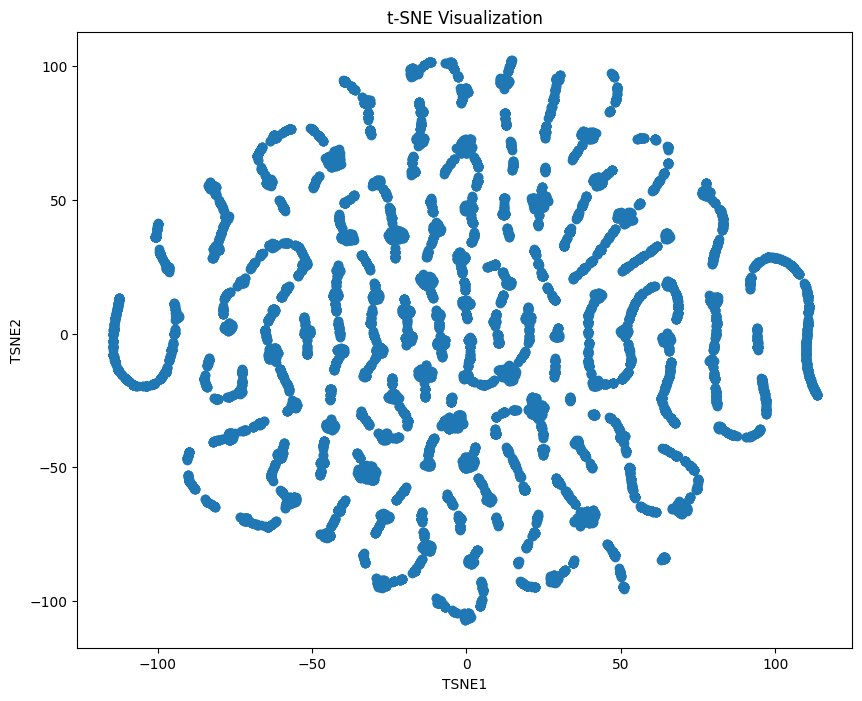

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Sample Data
# df = your_dataframe_here

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df)

# Convert to DataFrame for easier plotting
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results[:, 0],
    'TSNE2': tsne_results[:, 1]
})

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE Visualization')
plt.show()
